[Implementation Website](https://towardsdatascience.com/decision-trees-explained-d7678c43a59e)

## Downloading the dataset:
root node and notice that our training population has 45 samples, divided into 3 classes like so: [13, 19, 13].

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
# Modifying the dataset
X[y==1,2] = X[y==1,2] + 0.3
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.5, random_state=2)
# Decreasing the train set to make things more interesting
X_train = X_train[30:,:]
Y_train = Y_train[30:,:]

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Let’s visualize the dataset.

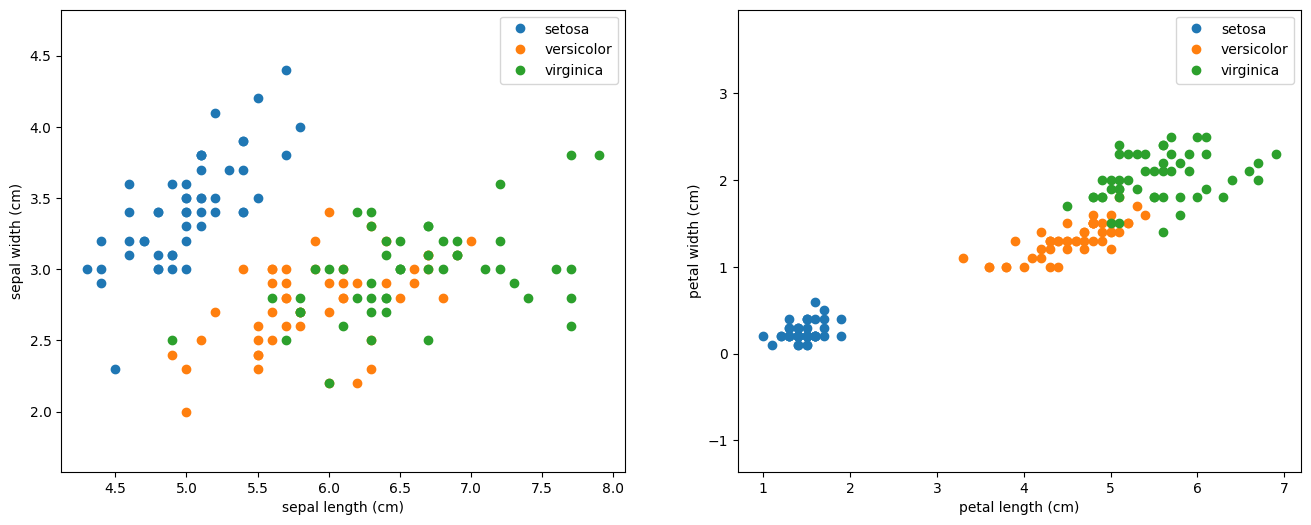

In [ ]:
# Visualize the data sets
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();
plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

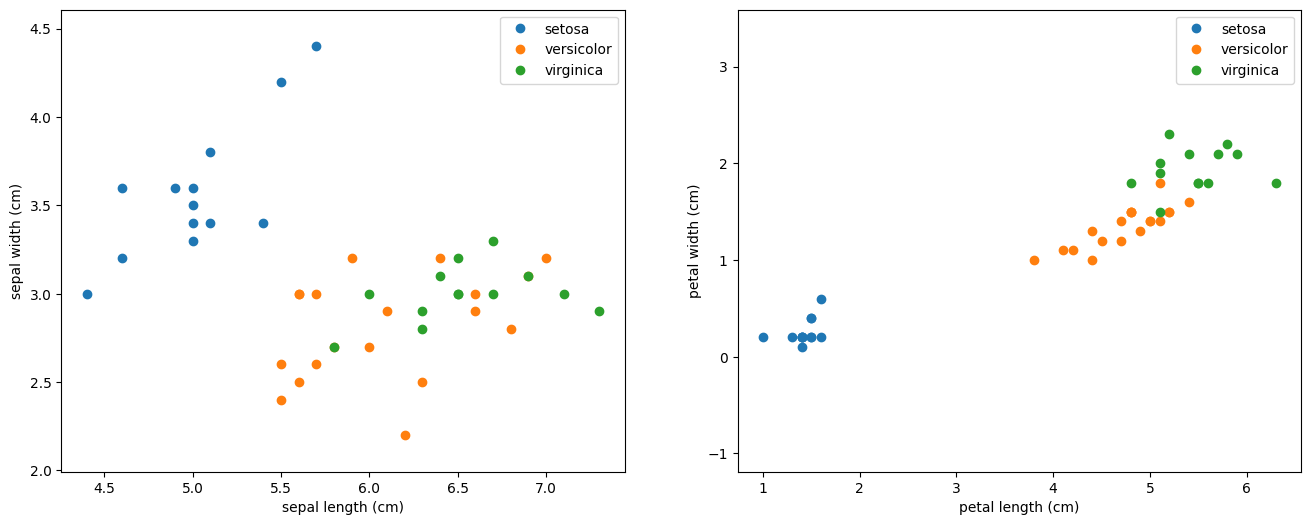

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X_train[Y_train[:,target] == 1]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();
plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X_train[Y_train[:,target] == 1]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend();

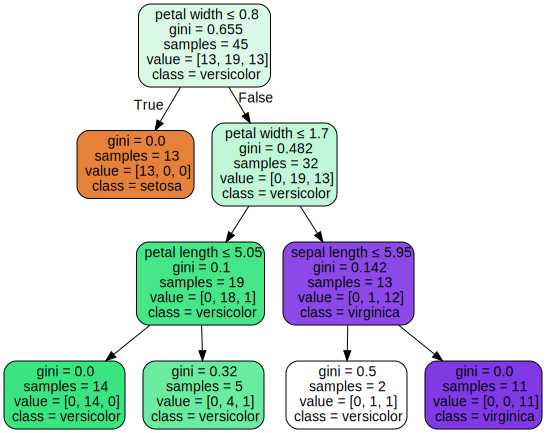

In [ ]:
from sklearn import tree
import graphviz
iristree = tree.DecisionTreeClassifier(max_depth=3, criterion='gini', random_state=0)
iristree.fit(X_train, enc.inverse_transform(Y_train))
feature_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
dot_data = tree.export_graphviz(iristree, out_file=None,
                      feature_names=feature_names,
                      class_names=names,
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
iristrainpred = iristree.predict(X_train)
iristestpred = iristree.predict(X_test)
# train precision:
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[0]))
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[1]))
display(precision_score(enc.inverse_transform(Y_train), iristrainpred.reshape(-1,1), average='micro', labels=[2]))

1.0

0.9047619047619048

1.0

In [ ]:
# test precision:
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[0]))
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[1]))
display(precision_score(enc.inverse_transform(Y_test), iristestpred.reshape(-1,1), average='micro', labels=[2]))

1.0

0.7586206896551724

0.9473684210526315